In [1]:
from change_graph import ChangeGraph
from simulator import dataset
from feature.scaler import StandardScaler

In [2]:
ds = dataset.RandomDataset(cols=3,
                        changing_cols=2,
                        change_start=0,
                        num_changepoints=2,
                        drift_steps=50,
                        size=500)

100%|██████████| 500/500 [00:00<00:00, 7750.18it/s]


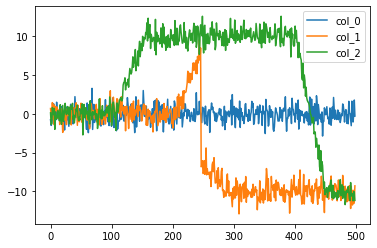

In [3]:
ds.generate(progress=True)
ds.plot(True)

['col_1', 'col_2']

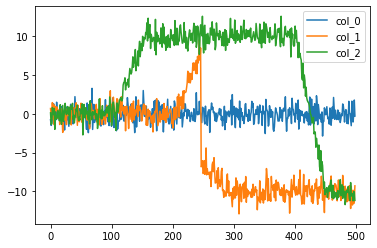

In [4]:
model = ChangeGraph(ds.changing_cols,
                    cat_features=[],
                    window_size=10,
                    num_scaler=StandardScaler)

# ds.to_df().to_csv('test.csv', index=False)
ds.to_df(True).plot(legend=True)
ds.changing_cols

[249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265]


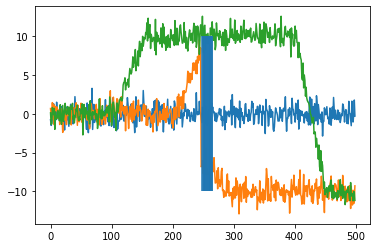

In [5]:
# ds.changing_cols
import random

df = ds.to_df()
res = []
for i, x in df.iterrows():
    d = x.to_dict()
    triggered, _, _, _ = model.learn_one(i, d, node_id=None)
    if triggered:
        res.append(i)

import matplotlib.pyplot as plt

print(res)

ds.plot()
plt.vlines(res, -10, 10)

In [25]:
import numpy as np

def cond(arr):
    return np.all(arr == arr[0])

target = np.array([[1, 2, 3], [2, 2, -1]])

# t[np.all(t>0, axis=1) and t[:, 0]==1]
target = target[[e[0] == 1 and e[0]==0  for e in t]]

array([[1, 2, 3]])